In [1]:
# importing the necessary libraries
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

<img src="http://drive.google.com/uc?export=view&id=18q7KL4aV6McMtaid_1Let2aGkw6d4QYn" width=45%>
<img src="RL-day3-1.png" width=45%>

In [2]:
class GridWorld:
    """
    The gridworls is a frequently used demo environment in reinforcement learning
    to try and test ideas.
    Today, we will use it to understand the concepts so far.
    
    The environment: (see image)
    * cells: the agent can step on a cell. There is exactly one cell to start from.
    This is the top left corner. There is one terminal cell where the walking ends, 
    the agent can not leave it (blue).
    * obstacles: there are cells where the agent can not step. (gray)
    * agent: it can move from one cell to an other neighboring cell. 
    Possible directions: up, down, left, right. Each transition happens with probability 1.
    * reward: after each transition the agent receives -1 point. In the terminal cell, no reward
    received anymore.
    
    Implement the environment below!
    """
    def __init__(self, size, start_cell, obstacles, terminating_state):
        self.size = size
        self.start = start_cell
        self.obstacles = obstacles
        self.termin = terminating_state
        self.current_cell = self.start
    
    def reset(self):
        # ----- reset the current cell to the start cell to start again -----
        self.current_cell = self.start
    
    def transition(self, cell, action):
        # ----- IMPLEMENT FUNCTION -----
        # cell = (row, column) indices
        # action: 0 left, 1 up, 2 right, 3 down
        # returns: What will be the next state
        # Take care of the borders of the grid!
        delta = [(0, -1), (-1, 0), (0, 1), (1, 0)]
        r_next = cell[0] + delta[action][0]
        c_next =  cell[1] + delta[action][1]
        # Check borders, obstacles and termination
        if 0 <= r_next < self.size[0
        ] and 0 <= c_next < self.size[1
        ] and (r_next, c_next) not in self.obstacles \
        and cell != self.termin:
            self.current_cell = (r_next, c_next)
            return (r_next, c_next)
        r, c = cell
        self.current_cell = (r, c)
        return (r, c)

    def reward(self, cell, action):
        # ----- RETURN REWARD -----
        # -1 if not in the terminal state
        if cell == self.termin:
            return 0
        else:
            return -1
    
    def in_terminal(self):
        return self.current_cell == self.termin

In [3]:
class DPsolver:
    """
    This solver is based on the Bellman-equation and it is 
    solved iteratively .
    The action-value is used to represent the utility of the 
    actions and states.
    """

    def __init__(self, gridworld, gamma, iterations):
        # setting parametes according to the input parameters
        self.gridworld = gridworld
        self.gamma = gamma
        self.iterations = iterations
        size = gridworld.size
        # initialize accumulaters
        self.cntr = 0
        self.sum_rewards = []
        self.path = []
        # ----- initialize the table for Q-function -----
        self.q_table = np.zeros((4, size[0], size[1]))

    def step(self):
        # ----- WRITE THE CODE BELOW -----
        # implement one step in the value iteration
        rows, cols = self.gridworld.size  # ask for the size of the grid
        # ----- cycle over the rows -----
        for r in range(rows):
            # ----- cycle over the columns -----
            for c in range(cols):
                # ----- cycle over the actions -----
                for act in range(4):
                    # ----- get the reward -----
                    reward = self.gridworld.reward((r, c), act)
                    # ----- calculate the corresponding next step (what would happen) -----
                    next_cell = self.gridworld.transition((r, c), act)
                    r2, c2 = next_cell
                    # ----- update the q-table -----
                    self.q_table[act, r, c] = reward + self.gamma * self.q_table[:, r2, c2].max()
        # increase the counter
        self.cntr += 1
        # add the return to the sum_rewards list
        self.sum_rewards.append(self.trajectory())

    def trajectory(self):
        # ----- IMPLEMENT THE FUNCTION -----
        # reset the gridworld
        self.gridworld.reset()
        # calculate the return along a trajectory followed by the current policy
        # when started from the start_cell
        sum_rewards = 0
        cell = self.gridworld.current_cell
        visited = set()
        while not self.gridworld.in_terminal():
            if cell in visited:
                # Break if a cycle is detected
                print("ERROR: Not moving, stopping this run.")
                break
            visited.add(cell)
            action = np.argmax(self.q_table[:, cell[0], cell[1]])
            reward = self.gridworld.reward(cell, action)
            sum_rewards += reward
            cell = self.gridworld.transition(cell, action)
            self.path.append(cell)
            
        return sum_rewards

    def is_learning_finished(self):
        # ----- IMPLEMENT THIS FUNCTION -----
        # check whether learning has finished, return it
        return self.cntr >= self.iterations

In [4]:
def plot_learning_curve(ql):
    values = ql.sum_rewards
    x = list(range(len(values)))
    y = values
    plt.plot(x, y, 'ro')
    plt.show()

ERROR: Not moving, stopping this run.
-1
ERROR: Not moving, stopping this run.
-1
ERROR: Not moving, stopping this run.
-1
ERROR: Not moving, stopping this run.
-1
ERROR: Not moving, stopping this run.
-1
ERROR: Not moving, stopping this run.
-1
ERROR: Not moving, stopping this run.
-1
ERROR: Not moving, stopping this run.
-1
-8
-8


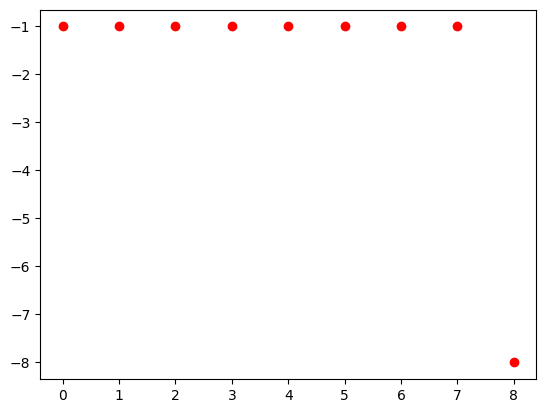

In [5]:
# grid world parameters
size = (6, 6)
start_cell = (0, 0)
obstacles = [(3, 3)]
terminating_state = (3, 5)
# q learning parameters
gamma = 0.9
# ----- What is the minimum required number of iterations? -----
iterations = 9
# In this case this value is easy to find, because the optimal
# solution can be figured out manually pretty easily. If we
# cannot be so sure that we have found the optimal one in a
# more complex setting, we could introduce more iterations and
# check whether any improvements are made later on.

gw = GridWorld(size, start_cell, obstacles, terminating_state)
solver = DPsolver(gw, gamma, iterations)

while not solver.is_learning_finished():
    solver.step()
    sum_rewards = solver.sum_rewards[-1]
    print(sum_rewards)

sum_rewards = solver.trajectory()
print(sum_rewards)
plot_learning_curve(solver)